In [1]:
from utils import get_som_labeled_img, check_ocr_box, get_caption_model_processor, get_yolo_model
import torch
from ultralytics import YOLO
from PIL import Image
device = 'cuda'

som_model = get_yolo_model(model_path='weights/icon_detect/best.pt')
som_model.to(device)
print('model to {}'.format(device))

model to cuda


In [2]:
# two choices for caption model: fine-tuned blip2 or florence2

# caption_model_processor = get_caption_model_processor(model_name="blip2", model_name_or_path="weights/icon_caption_blip2", device=device)
caption_model_processor = get_caption_model_processor(model_name="florence2", model_name_or_path="weights/icon_caption_florence", device=device)



Florence2LanguageForConditionalGeneration has generative capabilities, as `prepare_inputs_for_generation` is explicitly overwritten. However, it doesn't directly inherit from `GenerationMixin`. From 👉v4.50👈 onwards, `PreTrainedModel` will NOT inherit from `GenerationMixin`, and this model will lose the ability to call `generate` and other related functions.
  - If you're using `trust_remote_code=True`, you can get rid of this warning by loading the model with an auto class. See https://huggingface.co/docs/transformers/en/model_doc/auto#auto-classes
  - If you are the owner of the model architecture code, please modify your model class such that it inherits from `GenerationMixin` (after `PreTrainedModel`, otherwise you'll get an exception).
  - If you are not the owner of the model architecture class, please contact the model code owner to update it.


In [3]:
som_model.device, type(som_model) 

(device(type='cuda', index=0), ultralytics.models.yolo.model.YOLO)

In [10]:

cnt = 0
image_path = 'imgs/google_page.png'
# image_path = 'imgs/windows_home.png'
image_path = 'imgs/windows_multitab.png'

BOX_TRESHOLD = 0.03

image = Image.open(image_path)
image_rgb = image.convert('RGB')
box_overlay_ratio = image.size[0] / 3200
draw_bbox_config = {
    'text_scale': 0.8 * box_overlay_ratio,
    'text_thickness': max(int(2 * box_overlay_ratio), 1),
    'text_padding': max(int(3 * box_overlay_ratio), 1),
    'thickness': max(int(3 * box_overlay_ratio), 1),
}

ocr_bbox_rslt, is_goal_filtered = check_ocr_box(image_path, display_img = False, output_bb_format='xyxy', goal_filtering=None, easyocr_args={'paragraph': False, 'text_threshold':0.9}, use_paddleocr=True)
text, ocr_bbox = ocr_bbox_rslt

dino_labled_img, label_coordinates, parsed_content_list = get_som_labeled_img(image_path, som_model, BOX_TRESHOLD = BOX_TRESHOLD, output_coord_in_ratio=False, ocr_bbox=ocr_bbox,draw_bbox_config=draw_bbox_config, caption_model_processor=caption_model_processor, ocr_text=text,use_local_semantics=True, iou_threshold=0.1, imgsz=640)





image 1/1 /home/yadonglu/OmniParser/imgs/windows_multitab.png: 448x640 215 0s, 5.8ms
Speed: 2.1ms preprocess, 5.8ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)


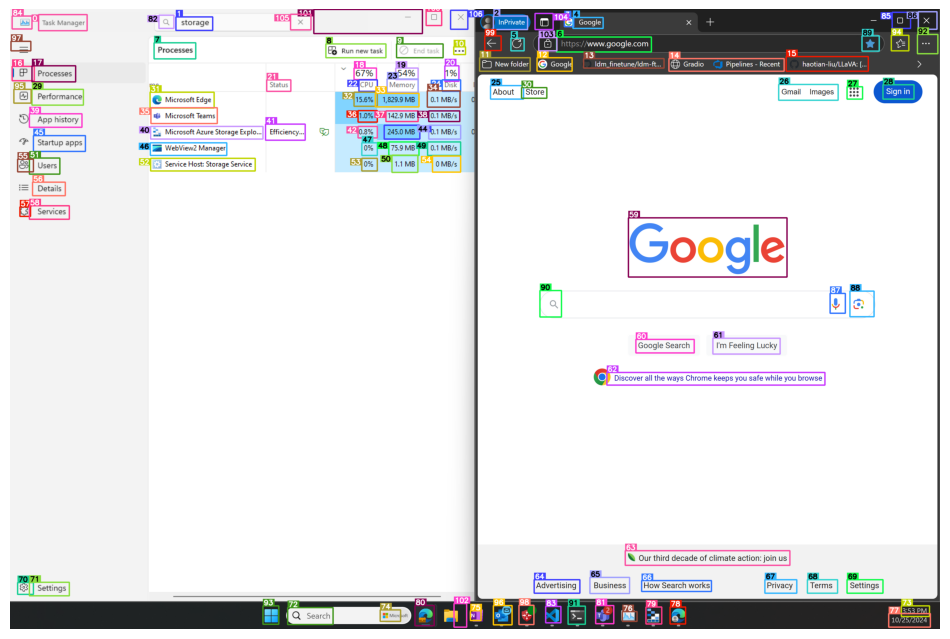

In [11]:
# plot dino_labled_img it is in base64
import base64
import matplotlib.pyplot as plt
import io
plt.figure(figsize=(12,12))

image = Image.open(io.BytesIO(base64.b64decode(dino_labled_img)))
plt.axis('off')

plt.imshow(image)


In [12]:
# print(label_coordinates)
parsed_content_list

['Text Box ID 0: Task Manager',
 'Text Box ID 1: storage',
 'Text Box ID 2: ) InPrivate',
 'Text Box ID 3: G',
 'Text Box ID 4: Google',
 'Text Box ID 5: C',
 'Text Box ID 6: https://www.google.com',
 'Text Box ID 7: Processes',
 'Text Box ID 8:  Run new task',
 'Text Box ID 9: O End task',
 'Text Box ID 10: ...',
 'Text Box ID 11:  New folder',
 'Text Box ID 12: G Google',
 'Text Box ID 13: ) Idm_finetune/ldm-ft...',
 'Text Box ID 14:  Gradio Pipelines - Recent',
 'Text Box ID 15: ) haotian-liu/LLaVA: [..',
 'Text Box ID 16: I P',
 'Text Box ID 17: Processes',
 'Text Box ID 18: 67%',
 'Text Box ID 19: 54%',
 'Text Box ID 20: 1%',
 'Text Box ID 21: Status',
 'Text Box ID 22: CPU',
 'Text Box ID 23: Memory',
 'Text Box ID 24: Disk',
 'Text Box ID 25: About',
 'Text Box ID 26: GmailImages',
 'Text Box ID 27: ::',
 'Text Box ID 28: Sign in',
 'Text Box ID 29: Performance',
 'Text Box ID 30: Store',
 'Text Box ID 31: @ Microsoft Edge',
 'Text Box ID 32: 15.6%',
 'Text Box ID 33: 1,829.9 MB